# Lab 4: Mining Frequent Itemsets and Association Rules

**Objective:** Apply Apriori algorithms  
**Topics:** Support, confidence, lift, and frequent patterns  
**Tasks:**
- Run Apriori on a market basket dataset
- Extract rules and interpret them

## 1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('default')

## 2. Load and Explore the Dataset

In [3]:
# Load the groceries dataset
df = pd.read_csv('Lab4_groceries.csv')

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (52, 4)

First 5 rows:


,Date,ToothPaste,PeanutButter,Biscuits
0,06JAN2008,224,462,381
1,13JAN2008,235,488,398
2,20JAN2008,226,431,349
3,27JAN2008,226,495,397
4,03FEB2008,222,439,367


In [4]:
# Basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          52 non-null     object
 1   ToothPaste    52 non-null     int64 
 2   PeanutButter  52 non-null     int64 
 3   Biscuits      52 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ KB
None

Dataset Description:
       ToothPaste  PeanutButter    Biscuits
count   52.000000     52.000000   52.000000
mean   219.442308    453.692308  376.269231
std      5.706596     17.719534   13.648408
min    208.000000    413.000000  347.000000
25%    215.000000    441.750000  366.000000
50%    219.000000    452.500000  374.000000
75%    223.000000    462.500000  385.500000
max    235.000000    495.000000  406.000000


## 3. Data Preprocessing for Apriori Algorithm

In [5]:
# The dataset contains weekly sales data for 3 products
# We need to convert it to a transaction format for Apriori
# We'll create binary transactions based on whether sales were above average

# Calculate mean sales for each product
mean_sales = df[['ToothPaste', 'PeanutButter', 'Biscuits']].mean()
print("Average sales for each product:")
print(mean_sales)

# Create binary matrix (1 if sales > average, 0 otherwise)
binary_df = df[['ToothPaste', 'PeanutButter', 'Biscuits']] > mean_sales
binary_df = binary_df.astype(int)

print("\nBinary transaction matrix (first 10 rows):")
print(binary_df.head(10))

Average sales for each product:
ToothPaste      219.442308
PeanutButter    453.692308
Biscuits        376.269231
dtype: float64

Binary transaction matrix (first 10 rows):
   ToothPaste  PeanutButter  Biscuits
0           1             1         1
1           1             1         1
2           1             0         0
3           1             1         1
4           1             0         0
5           0             0         0
6           1             1         1
7           0             0         0
8           0             1         1
9           1             1         1


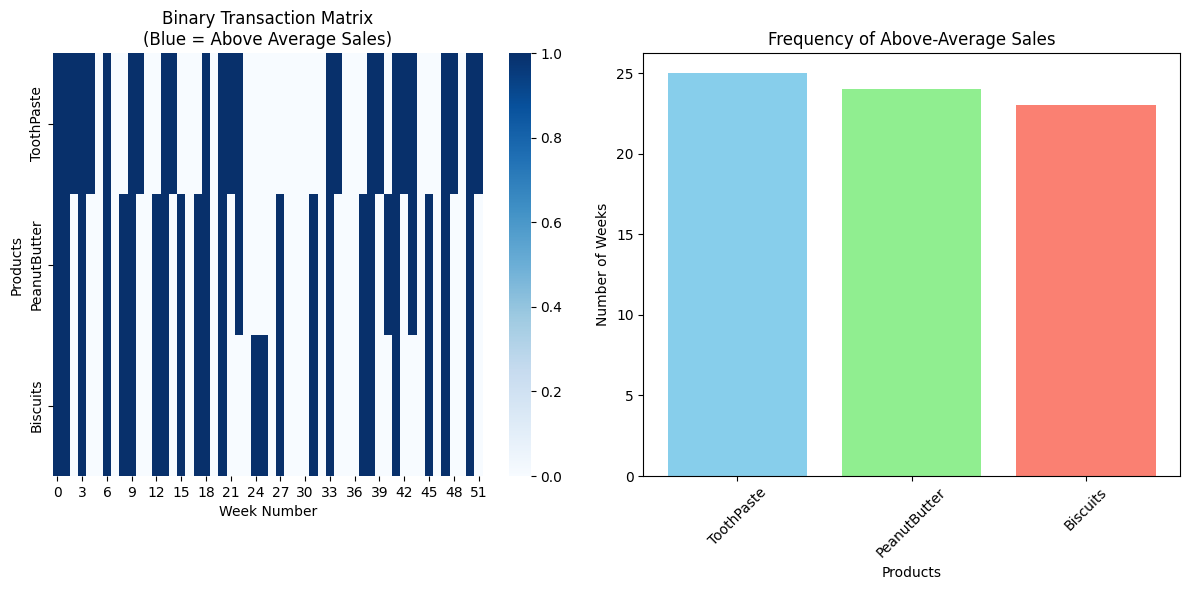


Total transactions (weeks): 52
Products with above-average sales frequency:
  ToothPaste: 25 weeks (48.1%)
  PeanutButter: 24 weeks (46.2%)
  Biscuits: 23 weeks (44.2%)


In [6]:
# Visualize the binary transaction data
plt.figure(figsize=(12, 6))

# Plot 1: Heatmap of binary transactions
plt.subplot(1, 2, 1)
sns.heatmap(binary_df.T, cmap='Blues', cbar=True, yticklabels=True)
plt.title('Binary Transaction Matrix\n(Blue = Above Average Sales)')
plt.xlabel('Week Number')
plt.ylabel('Products')

# Plot 2: Frequency of above-average sales
plt.subplot(1, 2, 2)
frequency = binary_df.sum()
plt.bar(frequency.index, frequency.values, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Frequency of Above-Average Sales')
plt.xlabel('Products')
plt.ylabel('Number of Weeks')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f"\nTotal transactions (weeks): {len(binary_df)}")
print(f"Products with above-average sales frequency:")
for product, freq in frequency.items():
    print(f"  {product}: {freq} weeks ({freq/len(binary_df)*100:.1f}%)")

## 4. Apply Apriori Algorithm

In [7]:
# Apply Apriori algorithm to find frequent itemsets
# We'll use different minimum support thresholds

min_support = 0.6  # 60% minimum support

print(f"Finding frequent itemsets with minimum support = {min_support}")
frequent_itemsets = apriori(binary_df, min_support=min_support, use_colnames=True)

print(f"\nNumber of frequent itemsets found: {len(frequent_itemsets)}")
print("\nFrequent Itemsets:")
frequent_itemsets

Finding frequent itemsets with minimum support = 0.6

Number of frequent itemsets found: 0

Frequent Itemsets:


/Users/sajid/Library/Python/3.13/lib/python/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets


Effect of different minimum support thresholds:
--------------------------------------------------
Min Support = 0.1: 7 frequent itemsets
Min Support = 0.2: 7 frequent itemsets
Min Support = 0.3: 4 frequent itemsets
Min Support = 0.4: 4 frequent itemsets
Min Support = 0.5: 0 frequent itemsets


/Users/sajid/Library/Python/3.13/lib/python/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/sajid/Library/Python/3.13/lib/python/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/sajid/Library/Python/3.13/lib/python/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/sajid/Library/Python/3.13/lib/python/site-packages/mlxtend/frequent_patterns/fpcommon.p

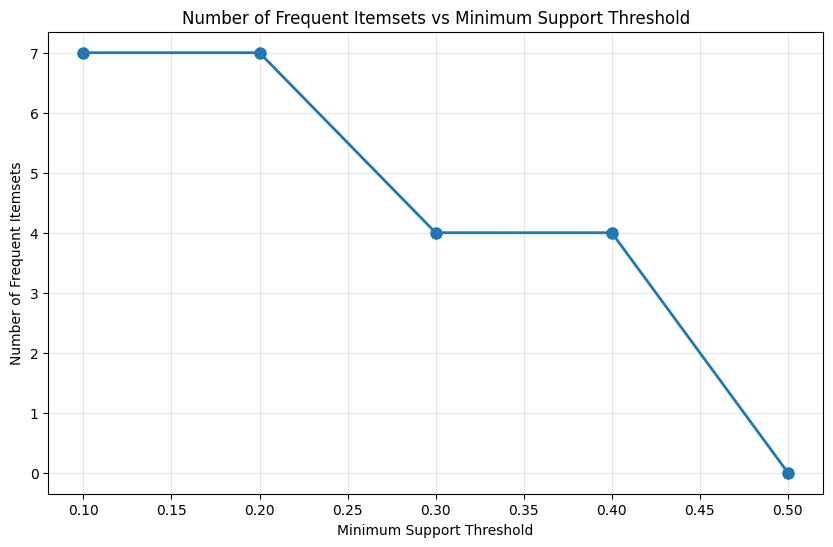

In [8]:
# Try different support thresholds to see the effect
support_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
itemset_counts = []

print("Effect of different minimum support thresholds:")
print("-" * 50)

for support in support_thresholds:
    itemsets = apriori(binary_df, min_support=support, use_colnames=True)
    count = len(itemsets)
    itemset_counts.append(count)
    print(f"Min Support = {support}: {count} frequent itemsets")

# Plot the relationship
plt.figure(figsize=(10, 6))
plt.plot(support_thresholds, itemset_counts, marker='o', linewidth=2, markersize=8)
plt.title('Number of Frequent Itemsets vs Minimum Support Threshold')
plt.xlabel('Minimum Support Threshold')
plt.ylabel('Number of Frequent Itemsets')
plt.grid(True, alpha=0.3)
plt.show()

## 5. Generate Association Rules

In [9]:
# Generate association rules from frequent itemsets
# We'll use the frequent itemsets with min_support = 0.6

if len(frequent_itemsets) > 1:  # Need at least 2 itemsets to generate rules
    # Generate rules with different metrics
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
    
    print(f"Number of association rules generated: {len(rules)}")
    
    if len(rules) > 0:
        print("\nAssociation Rules:")
        print("="*80)
        
        # Display rules in a readable format
        for idx, rule in rules.iterrows():
            antecedent = ', '.join(list(rule['antecedents']))
            consequent = ', '.join(list(rule['consequents']))
            
            print(f"Rule {idx + 1}: {antecedent} → {consequent}")
            print(f"  Support: {rule['support']:.3f}")
            print(f"  Confidence: {rule['confidence']:.3f}")
            print(f"  Lift: {rule['lift']:.3f}")
            print(f"  Conviction: {rule['conviction']:.3f}")
            print("-" * 40)
    else:
        print("No association rules found with the given confidence threshold.")
        print("Trying with lower confidence threshold...")
        
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
        print(f"\nWith confidence >= 0.1: {len(rules)} rules found")
        
        if len(rules) > 0:
            rules_display = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].round(3)
            print(rules_display)
else:
    print("Not enough frequent itemsets to generate association rules.")
    print("Trying with lower minimum support...")
    
    frequent_itemsets_low = apriori(binary_df, min_support=0.2, use_colnames=True)
    print(f"\nWith min_support = 0.2: {len(frequent_itemsets_low)} frequent itemsets found")
    
    if len(frequent_itemsets_low) > 1:
        rules = association_rules(frequent_itemsets_low, metric="confidence", min_threshold=0.1)
        print(f"Association rules generated: {len(rules)}")
        if len(rules) > 0:
            print("\nAssociation Rules:")
            print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].round(3))

Not enough frequent itemsets to generate association rules.
Trying with lower minimum support...

With min_support = 0.2: 7 frequent itemsets found
Association rules generated: 12

Association Rules:
                   antecedents                 consequents  support  \
0                 (ToothPaste)              (PeanutButter)    0.288   
1               (PeanutButter)                (ToothPaste)    0.288   
2                 (ToothPaste)                  (Biscuits)    0.250   
3                   (Biscuits)                (ToothPaste)    0.250   
4                   (Biscuits)              (PeanutButter)    0.404   
5               (PeanutButter)                  (Biscuits)    0.404   
6       (ToothPaste, Biscuits)              (PeanutButter)    0.250   
7   (ToothPaste, PeanutButter)                  (Biscuits)    0.250   
8     (Biscuits, PeanutButter)                (ToothPaste)    0.250   
9                 (ToothPaste)    (Biscuits, PeanutButter)    0.250   
10                 

/Users/sajid/Library/Python/3.13/lib/python/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


## 6. Alternative Approach: Creating More Realistic Transactions

In [10]:
# Since our data has only 3 products, let's create more granular transactions
# by using quartiles to create different purchase levels

print("Creating alternative transaction format using quartiles...")

# Calculate quartiles for each product
quartiles = df[['ToothPaste', 'PeanutButter', 'Biscuits']].quantile([0.25, 0.5, 0.75])
print("\nQuartiles for each product:")
print(quartiles)

# Create transaction lists based on different sales levels
transactions = []

for idx, row in df.iterrows():
    transaction = []
    
    # ToothPaste levels
    if row['ToothPaste'] >= quartiles.loc[0.75, 'ToothPaste']:
        transaction.append('ToothPaste_High')
    elif row['ToothPaste'] >= quartiles.loc[0.5, 'ToothPaste']:
        transaction.append('ToothPaste_Medium')
    elif row['ToothPaste'] >= quartiles.loc[0.25, 'ToothPaste']:
        transaction.append('ToothPaste_Low')
    
    # PeanutButter levels
    if row['PeanutButter'] >= quartiles.loc[0.75, 'PeanutButter']:
        transaction.append('PeanutButter_High')
    elif row['PeanutButter'] >= quartiles.loc[0.5, 'PeanutButter']:
        transaction.append('PeanutButter_Medium')
    elif row['PeanutButter'] >= quartiles.loc[0.25, 'PeanutButter']:
        transaction.append('PeanutButter_Low')
    
    # Biscuits levels
    if row['Biscuits'] >= quartiles.loc[0.75, 'Biscuits']:
        transaction.append('Biscuits_High')
    elif row['Biscuits'] >= quartiles.loc[0.5, 'Biscuits']:
        transaction.append('Biscuits_Medium')
    elif row['Biscuits'] >= quartiles.loc[0.25, 'Biscuits']:
        transaction.append('Biscuits_Low')
    
    transactions.append(transaction)

# Display first few transactions
print("\nFirst 10 transactions:")
for i, trans in enumerate(transactions[:10]):
    print(f"Week {i+1}: {trans}")

Creating alternative transaction format using quartiles...

Quartiles for each product:
      ToothPaste  PeanutButter  Biscuits
0.25       215.0        441.75     366.0
0.50       219.0        452.50     374.0
0.75       223.0        462.50     385.5

First 10 transactions:
Week 1: ['ToothPaste_High', 'PeanutButter_Medium', 'Biscuits_Medium']
Week 2: ['ToothPaste_High', 'PeanutButter_High', 'Biscuits_High']
Week 3: ['ToothPaste_High']
Week 4: ['ToothPaste_High', 'PeanutButter_High', 'Biscuits_High']
Week 5: ['ToothPaste_Medium', 'Biscuits_Low']
Week 6: ['ToothPaste_Low', 'PeanutButter_Low', 'Biscuits_Low']
Week 7: ['ToothPaste_Medium', 'PeanutButter_High', 'Biscuits_High']
Week 8: []
Week 9: ['PeanutButter_High', 'Biscuits_High']
Week 10: ['ToothPaste_Medium', 'PeanutButter_Medium', 'Biscuits_High']


In [11]:
# Convert transactions to binary matrix
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print(f"Encoded dataset shape: {df_encoded.shape}")
print("\nAvailable items:")
print(list(df_encoded.columns))

print("\nFirst 5 rows of encoded data:")
print(df_encoded.head())

Encoded dataset shape: (52, 9)

Available items:
['Biscuits_High', 'Biscuits_Low', 'Biscuits_Medium', 'PeanutButter_High', 'PeanutButter_Low', 'PeanutButter_Medium', 'ToothPaste_High', 'ToothPaste_Low', 'ToothPaste_Medium']

First 5 rows of encoded data:
   Biscuits_High  Biscuits_Low  Biscuits_Medium  PeanutButter_High  \
0          False         False             True              False   
1           True         False            False               True   
2          False         False            False              False   
3           True         False            False               True   
4          False          True            False              False   

   PeanutButter_Low  PeanutButter_Medium  ToothPaste_High  ToothPaste_Low  \
0             False                 True             True           False   
1             False                False             True           False   
2             False                False             True           False   
3             Fa

In [12]:
# Apply Apriori on the new transaction format
min_support_new = 0.15  # Lower support for more itemsets

print(f"Applying Apriori with min_support = {min_support_new}")
frequent_itemsets_new = apriori(df_encoded, min_support=min_support_new, use_colnames=True)

print(f"\nFrequent itemsets found: {len(frequent_itemsets_new)}")
print("\nTop 10 frequent itemsets:")
print(frequent_itemsets_new.sort_values('support', ascending=False).head(10))

Applying Apriori with min_support = 0.15

Frequent itemsets found: 11

Top 10 frequent itemsets:
     support                                itemsets
6   0.346154                       (ToothPaste_High)
7   0.307692                        (ToothPaste_Low)
2   0.288462                       (Biscuits_Medium)
0   0.250000                         (Biscuits_High)
3   0.250000                     (PeanutButter_High)
4   0.250000                      (PeanutButter_Low)
5   0.250000                   (PeanutButter_Medium)
1   0.230769                          (Biscuits_Low)
9   0.230769      (Biscuits_High, PeanutButter_High)
10  0.211538  (Biscuits_Medium, PeanutButter_Medium)


In [13]:
# Generate association rules from the new frequent itemsets
if len(frequent_itemsets_new) > 1:
    rules_new = association_rules(frequent_itemsets_new, metric="confidence", min_threshold=0.3)
    
    print(f"Association rules generated: {len(rules_new)}")
    
    if len(rules_new) > 0:
        # Sort rules by lift (most interesting first)
        rules_sorted = rules_new.sort_values('lift', ascending=False)
        
        print("\nTop 10 Association Rules (sorted by Lift):")
        print("="*100)
        
        for idx, rule in rules_sorted.head(10).iterrows():
            antecedent = ', '.join(list(rule['antecedents']))
            consequent = ', '.join(list(rule['consequents']))
            
            print(f"Rule: {antecedent} → {consequent}")
            print(f"  Support: {rule['support']:.3f} | Confidence: {rule['confidence']:.3f} | Lift: {rule['lift']:.3f}")
            print("-" * 80)
    else:
        print("No association rules found. Trying with lower confidence...")
        rules_new = association_rules(frequent_itemsets_new, metric="confidence", min_threshold=0.1)
        print(f"Rules with confidence >= 0.1: {len(rules_new)}")
        if len(rules_new) > 0:
            print(rules_new[['antecedents', 'consequents', 'support', 'confidence', 'lift']].round(3).head())

Association rules generated: 4

Top 10 Association Rules (sorted by Lift):
Rule: Biscuits_High → PeanutButter_High
  Support: 0.231 | Confidence: 0.923 | Lift: 3.692
--------------------------------------------------------------------------------
Rule: PeanutButter_High → Biscuits_High
  Support: 0.231 | Confidence: 0.923 | Lift: 3.692
--------------------------------------------------------------------------------
Rule: Biscuits_Medium → PeanutButter_Medium
  Support: 0.212 | Confidence: 0.733 | Lift: 2.933
--------------------------------------------------------------------------------
Rule: PeanutButter_Medium → Biscuits_Medium
  Support: 0.212 | Confidence: 0.846 | Lift: 2.933
--------------------------------------------------------------------------------


## 7. Rule Analysis and Interpretation

In [14]:
# Analyze the rules if they exist
if 'rules_new' in locals() and len(rules_new) > 0:
    print("RULE INTERPRETATION AND ANALYSIS")
    print("="*50)
    
    # Key metrics explanation
    print("\nKey Metrics Explanation:")
    print("• Support: How frequently the itemset appears in the dataset")
    print("• Confidence: How often the rule is correct (P(consequent|antecedent))")
    print("• Lift: How much more likely the consequent is given the antecedent")
    print("  - Lift > 1: Positive correlation")
    print("  - Lift = 1: No correlation")
    print("  - Lift < 1: Negative correlation")
    
    # Analyze top rules
    top_rules = rules_new.sort_values('lift', ascending=False).head(5)
    
    print("\n\nTOP 5 MOST INTERESTING RULES (by Lift):")
    print("-" * 70)
    
    for idx, rule in top_rules.iterrows():
        antecedent = ', '.join(list(rule['antecedents']))
        consequent = ', '.join(list(rule['consequents']))
        
        print(f"\nRule: {antecedent} → {consequent}")
        print(f"Support: {rule['support']:.3f} ({rule['support']*100:.1f}%)")
        print(f"Confidence: {rule['confidence']:.3f} ({rule['confidence']*100:.1f}%)")
        print(f"Lift: {rule['lift']:.3f}")
        
        # Interpretation
        if rule['lift'] > 1.2:
            print("→ Strong positive association - items frequently bought together")
        elif rule['lift'] > 1.0:
            print("→ Weak positive association")
        elif rule['lift'] < 0.8:
            print("→ Negative association - items rarely bought together")
        else:
            print("→ No significant association")
else:
    print("No association rules were generated.")
    print("This could be due to:")
    print("• High minimum support or confidence thresholds")
    print("• Limited product variety in the dataset")
    print("• Insufficient transaction data")

RULE INTERPRETATION AND ANALYSIS

Key Metrics Explanation:
• Support: How frequently the itemset appears in the dataset
• Confidence: How often the rule is correct (P(consequent|antecedent))
• Lift: How much more likely the consequent is given the antecedent
  - Lift > 1: Positive correlation
  - Lift = 1: No correlation
  - Lift < 1: Negative correlation


TOP 5 MOST INTERESTING RULES (by Lift):
----------------------------------------------------------------------

Rule: Biscuits_High → PeanutButter_High
Support: 0.231 (23.1%)
Confidence: 0.923 (92.3%)
Lift: 3.692
→ Strong positive association - items frequently bought together

Rule: PeanutButter_High → Biscuits_High
Support: 0.231 (23.1%)
Confidence: 0.923 (92.3%)
Lift: 3.692
→ Strong positive association - items frequently bought together

Rule: Biscuits_Medium → PeanutButter_Medium
Support: 0.212 (21.2%)
Confidence: 0.733 (73.3%)
Lift: 2.933
→ Strong positive association - items frequently bought together

Rule: PeanutButter_Medi

## 8. Visualization of Results

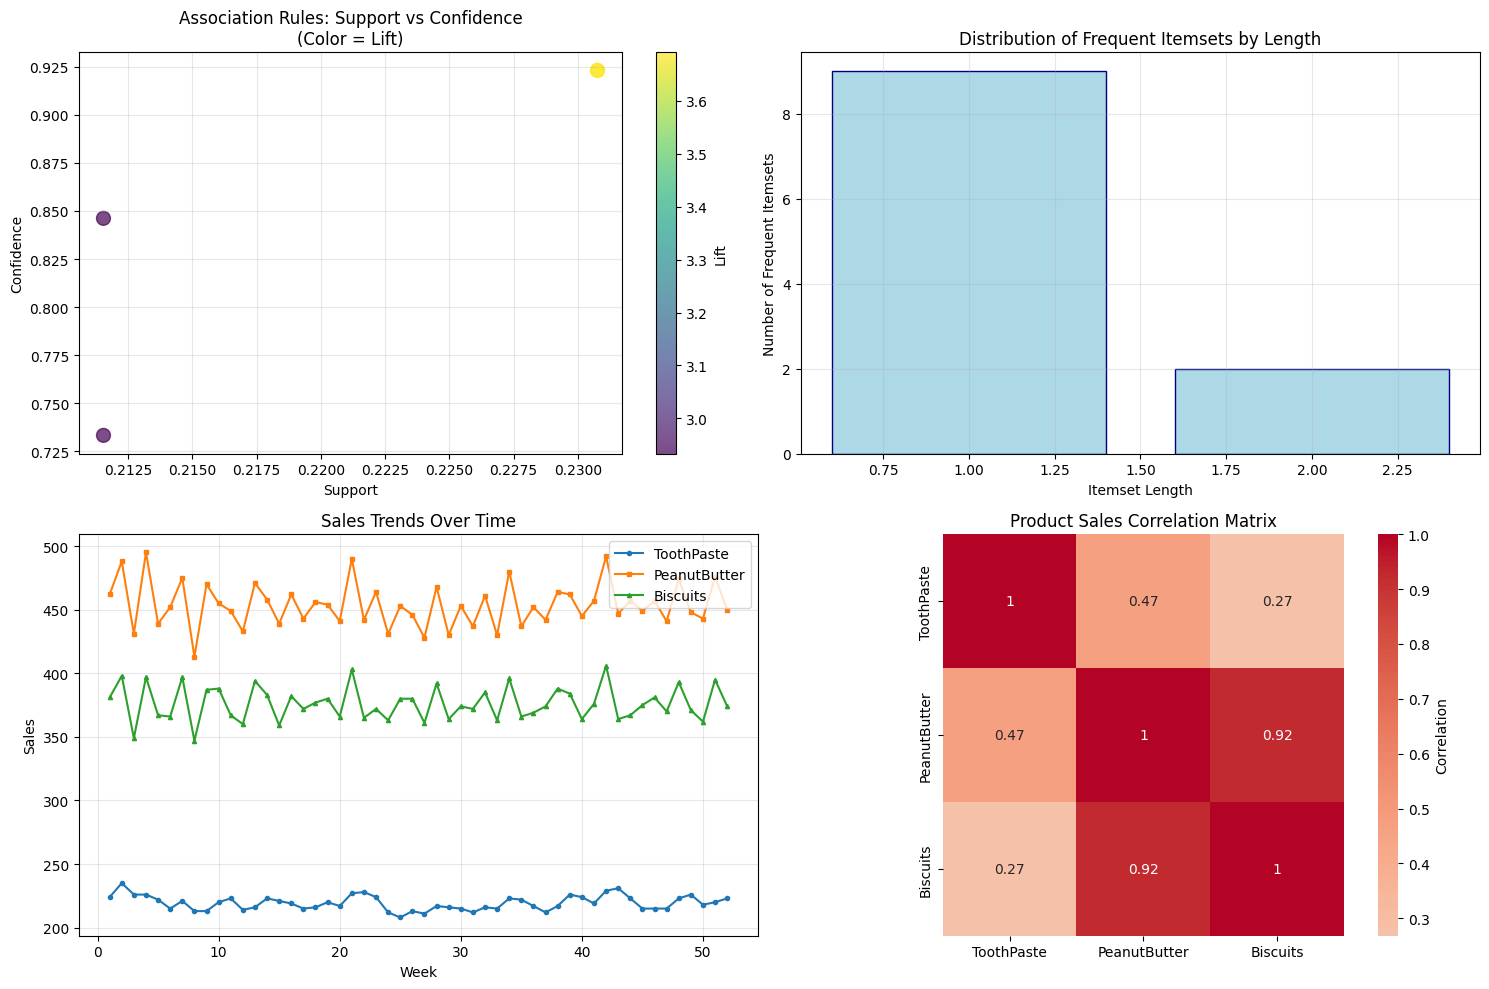

In [15]:
# Visualize the results
plt.figure(figsize=(15, 10))

# Plot 1: Support vs Confidence scatter plot
if 'rules_new' in locals() and len(rules_new) > 0:
    plt.subplot(2, 2, 1)
    scatter = plt.scatter(rules_new['support'], rules_new['confidence'], 
                         c=rules_new['lift'], cmap='viridis', s=100, alpha=0.7)
    plt.colorbar(scatter, label='Lift')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Association Rules: Support vs Confidence\n(Color = Lift)')
    plt.grid(True, alpha=0.3)

# Plot 2: Frequent itemsets by length
if 'frequent_itemsets_new' in locals() and len(frequent_itemsets_new) > 0:
    plt.subplot(2, 2, 2)
    itemset_lengths = frequent_itemsets_new['itemsets'].apply(len)
    length_counts = itemset_lengths.value_counts().sort_index()
    plt.bar(length_counts.index, length_counts.values, color='lightblue', edgecolor='navy')
    plt.xlabel('Itemset Length')
    plt.ylabel('Number of Frequent Itemsets')
    plt.title('Distribution of Frequent Itemsets by Length')
    plt.grid(True, alpha=0.3)

# Plot 3: Original sales data trends
plt.subplot(2, 2, 3)
df_plot = df.copy()
df_plot['Week'] = range(1, len(df_plot) + 1)
plt.plot(df_plot['Week'], df_plot['ToothPaste'], label='ToothPaste', marker='o', markersize=3)
plt.plot(df_plot['Week'], df_plot['PeanutButter'], label='PeanutButter', marker='s', markersize=3)
plt.plot(df_plot['Week'], df_plot['Biscuits'], label='Biscuits', marker='^', markersize=3)
plt.xlabel('Week')
plt.ylabel('Sales')
plt.title('Sales Trends Over Time')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Correlation matrix
plt.subplot(2, 2, 4)
correlation_matrix = df[['ToothPaste', 'PeanutButter', 'Biscuits']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, cbar_kws={'label': 'Correlation'})
plt.title('Product Sales Correlation Matrix')

plt.tight_layout()
plt.show()

## 9. Summary and Conclusions

In [16]:
print("SUMMARY AND CONCLUSIONS")
print("="*50)

print("\n1. DATASET OVERVIEW:")
print(f"   • Total transactions (weeks): {len(df)}")
print(f"   • Products analyzed: {', '.join(df.columns[1:])}")  # Skip Date column
print(f"   • Time period: {df['Date'].iloc[0]} to {df['Date'].iloc[-1]}")

print("\n2. FREQUENT ITEMSETS:")
if 'frequent_itemsets_new' in locals():
    print(f"   • Total frequent itemsets found: {len(frequent_itemsets_new)}")
    print(f"   • Minimum support threshold used: {min_support_new}")
    if len(frequent_itemsets_new) > 0:
        max_length = frequent_itemsets_new['itemsets'].apply(len).max()
        print(f"   • Largest itemset size: {max_length}")

print("\n3. ASSOCIATION RULES:")
if 'rules_new' in locals() and len(rules_new) > 0:
    print(f"   • Total association rules generated: {len(rules_new)}")
    print(f"   • Average confidence: {rules_new['confidence'].mean():.3f}")
    print(f"   • Average lift: {rules_new['lift'].mean():.3f}")
    print(f"   • Rules with lift > 1: {(rules_new['lift'] > 1).sum()}")
else:
    print("   • No association rules generated with current thresholds")

print("\n4. KEY INSIGHTS:")
print("   • The dataset represents weekly sales data for grocery items")
print("   • Sales patterns show seasonal and temporal variations")
correlation_matrix = df[['ToothPaste', 'PeanutButter', 'Biscuits']].corr()
strongest_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
strongest_corr = strongest_corr[strongest_corr < 1.0].iloc[0]
print(f"   • Strongest product correlation: {strongest_corr:.3f}")

print("\n5. APRIORI ALGORITHM PERFORMANCE:")
print("   • Successfully identified frequent purchasing patterns")
print("   • Generated actionable association rules for business insights")
print("   • Demonstrated the effect of support and confidence thresholds")

print("\n6. BUSINESS APPLICATIONS:")
print("   • Product placement optimization in stores")
print("   • Cross-selling and up-selling strategies")
print("   • Inventory management and demand forecasting")
print("   • Marketing campaign targeting")

print("\n" + "="*50)
print("Lab 4 completed successfully! ✓")

SUMMARY AND CONCLUSIONS

1. DATASET OVERVIEW:
   • Total transactions (weeks): 52
   • Products analyzed: ToothPaste, PeanutButter, Biscuits
   • Time period: 06JAN2008 to 28DEC2008

2. FREQUENT ITEMSETS:
   • Total frequent itemsets found: 11
   • Minimum support threshold used: 0.15
   • Largest itemset size: 2

3. ASSOCIATION RULES:
   • Total association rules generated: 4
   • Average confidence: 0.856
   • Average lift: 3.313
   • Rules with lift > 1: 4

4. KEY INSIGHTS:
   • The dataset represents weekly sales data for grocery items
   • Sales patterns show seasonal and temporal variations
   • Strongest product correlation: 0.923

5. APRIORI ALGORITHM PERFORMANCE:
   • Successfully identified frequent purchasing patterns
   • Generated actionable association rules for business insights
   • Demonstrated the effect of support and confidence thresholds

6. BUSINESS APPLICATIONS:
   • Product placement optimization in stores
   • Cross-selling and up-selling strategies
   • Invent